# Análise dos filmes que eu já vi

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('meus-filmes.csv')
df.head()

,Filme,País,Ano,Tempo,Meu_Rating,Outlier_t,Genero,Animação,Rating_Geral
0,The Nightmare Before Christmas,USA,1993,76,4.0,0,Fantasia,1,4.0
1,I Saw The TV Glow,USA,2024,100,4.0,0,Drama,0,3.5
2,Que Horas Ela Volta?,BRA,2015,112,5.0,0,Drama,0,4.1
3,Memento,USA,2000,113,4.0,0,Mistério,0,4.2
4,Les Yeux sans visage,FRA,1960,84,3.5,0,Terror,0,3.9


### 2. Gráfico de filmes por país:

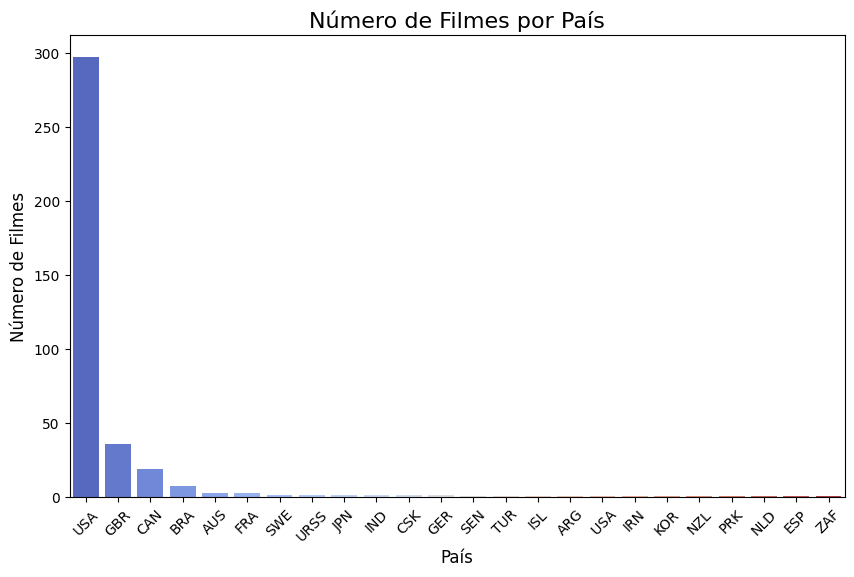

In [98]:
# Contar o número de filmes por país
filmes_por_pais = df['País'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_pais.index, y=filmes_por_pais.values, palette='coolwarm', hue=filmes_por_pais.index, legend=False)
plt.title('Número de Filmes por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


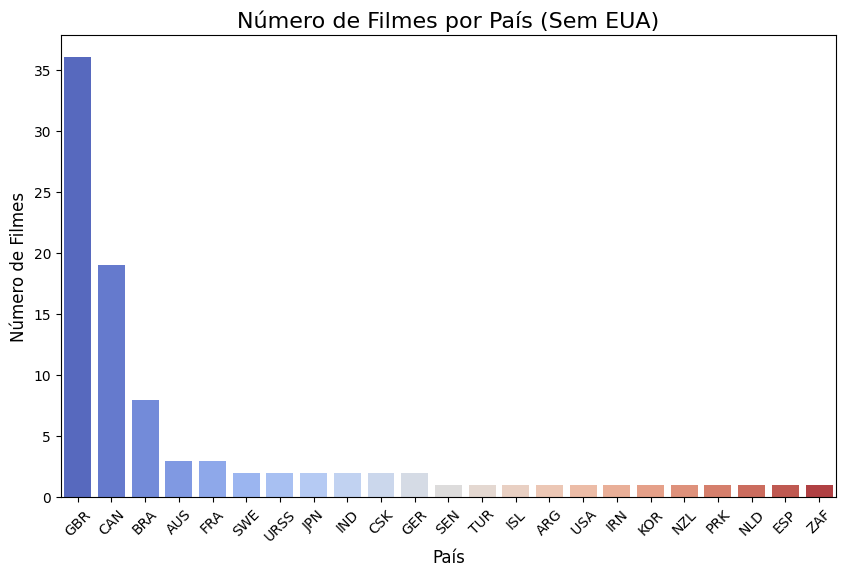

In [99]:
df_SEM_EUA = df[df['País'] != 'USA']
filmes_por_pais = df_SEM_EUA['País'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_pais.index, y=filmes_por_pais.values, palette='coolwarm', hue=filmes_por_pais.index, legend=False)
plt.title('Número de Filmes por País (Sem EUA)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 2. Distribuição da duração média dos filmes

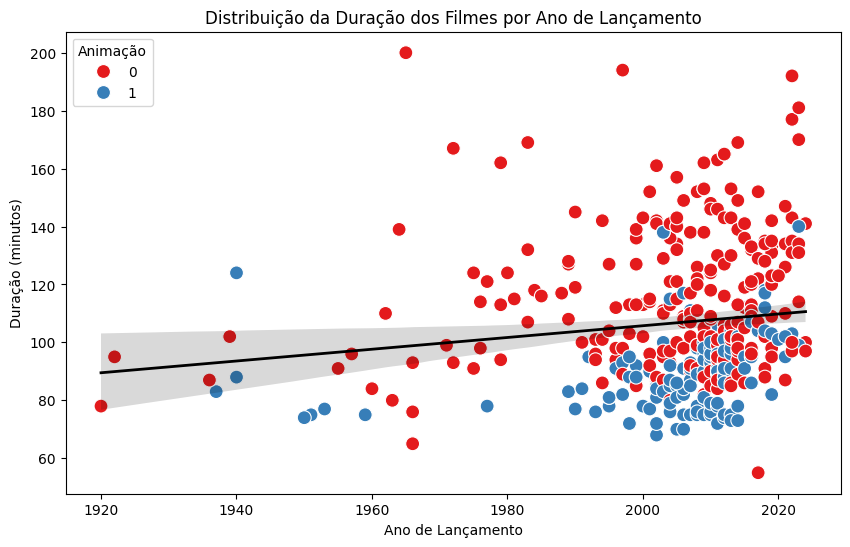

In [129]:
df_filtered = df[df['Outlier_t'] != True]
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_filtered, x="Ano", y="Tempo", hue="Animação", palette="Set1", s=100)
sns.regplot(x='Ano', y='Tempo', data=df_filtered, scatter=False, color='black', line_kws={"linewidth": 2})
plt.title('Distribuição da Duração dos Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()


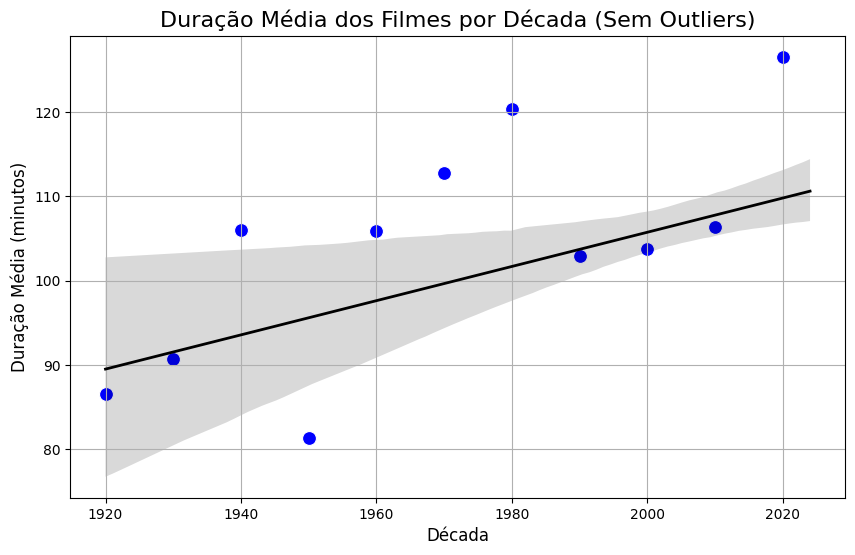

In [131]:
df['Década'] = (df['Ano'] // 10) * 10

df_sem_outliers = df[df['Outlier_t'] == 0]
duracao_media_decada = df_sem_outliers.groupby('Década')['Tempo'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=duracao_media_decada.index, y=duracao_media_decada.values, s=100, color='b')
sns.regplot(x='Ano', y='Tempo', data=df_sem_outliers, scatter=False, color='black', line_kws={"linewidth": 2})
plt.title('Duração Média dos Filmes por Década (Sem Outliers)', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Duração Média (minutos)', fontsize=12)
plt.grid(True)
plt.show()

### 3. Gráfico da quantidade de filmes assistidos por década

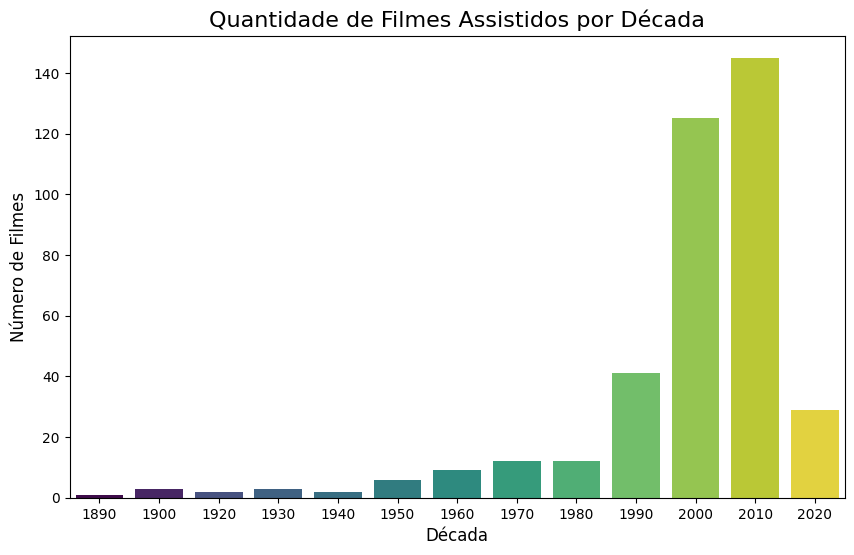

In [101]:
filmes_por_decada = df['Década'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette='viridis', hue=filmes_por_decada.index, legend=False)
plt.title('Quantidade de Filmes Assistidos por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.show()

### 4. Média de rating por gênero

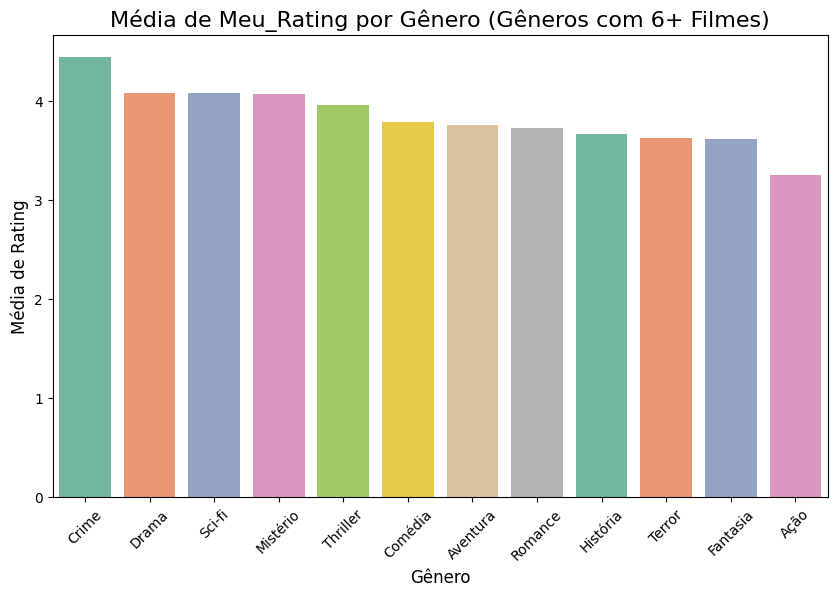

In [102]:
df_sem_na = df.dropna(subset=['Meu_Rating'])

contagem_generos = df_sem_na['Genero'].value_counts()
generos_suficientes = contagem_generos[contagem_generos >= 6].index # so generos com 6 ou ocorrencias
df_filtrado = df_sem_na[df_sem_na['Genero'].isin(generos_suficientes)]
media_rating_genero = df_filtrado.groupby('Genero')['Meu_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_rating_genero.index, y=media_rating_genero.values, palette='Set2', hue=media_rating_genero.index, legend=False)
plt.title('Média de Meu_Rating por Gênero (Gêneros com 6+ Filmes)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 5. Proporção de filmes que são animação

In [103]:
proporcao_animacao = df['Animação'].mean() * 100
print(f"Proporção de filmes que são animação: {proporcao_animacao:.2f}%")

Proporção de filmes que são animação: 35.38%


In [104]:
comparacao_animacao = df.groupby('Animação')[['Tempo', 'Meu_Rating', 'Rating_Geral']].mean()

print(comparacao_animacao)


               Tempo  Meu_Rating  Rating_Geral
Animação                                      
0         113.325397    3.778261      3.454667
1          90.166667    3.812500      3.467669


### 6. Distribuição da Duração dos Filmes (Histograma)
Entender a tendêndia de duração dos filmes que eu vejo. Aqui, podemos observar uma distribuição normal, com filmes próximos a 100 minutos sendo os mais comuns e filmes muito longos ou muito curtos aparecendo menos vezes.

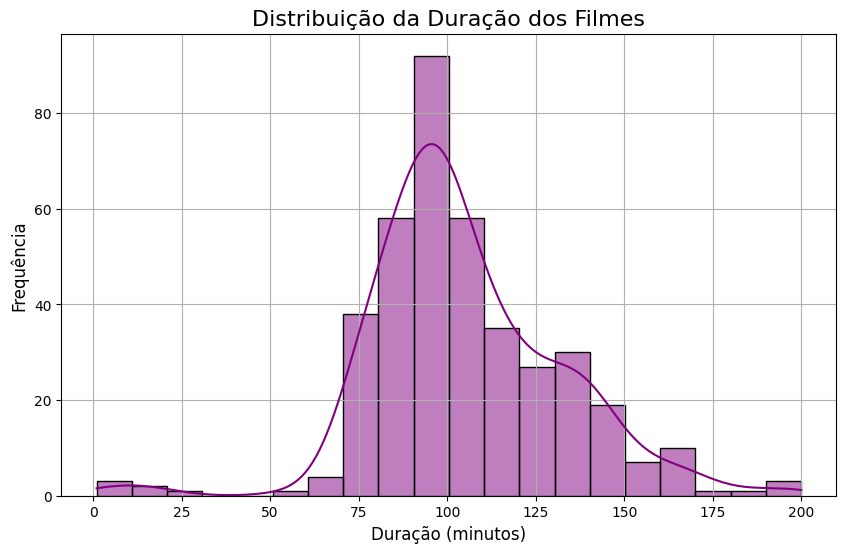

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tempo'], bins=20, kde=True, color='purple')
plt.title('Distribuição da Duração dos Filmes', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()


In [106]:
from scipy import stats

stat, p_value = stats.shapiro(df['Tempo'])
print(f"Estatística: {stat}, Valor-p: {p_value}")


Estatística: 0.9434952329166876, Valor-p: 4.9422401616476384e-11


### 7. Correlações entre Duração, Meu_Rating e Rating_Geral

Não há correlação com o meu rating e o tempo do filme.
Há uma forte correlação entre o meu rating e o rating geral, isso signifca que eu tendo a concordar com o rating geral.

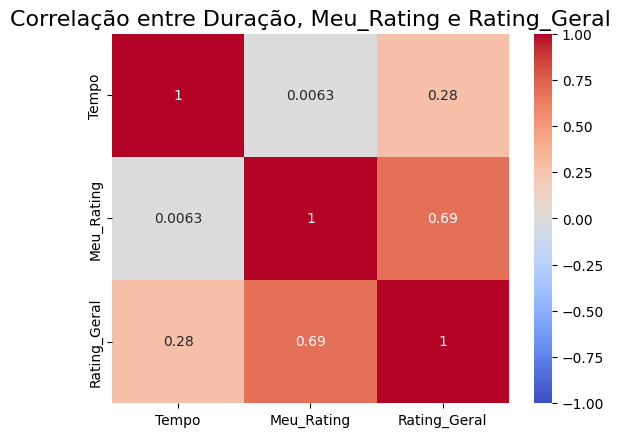

In [107]:
correlacoes = df[['Tempo', 'Meu_Rating', 'Rating_Geral']].corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Duração, Meu_Rating e Rating_Geral', fontsize=16)
plt.show()

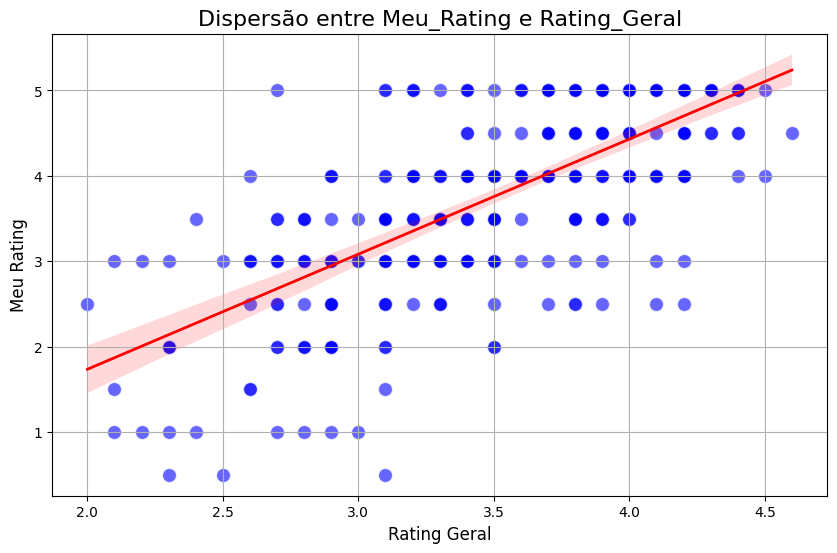

In [116]:
df_sem_na = df.dropna(subset=['Meu_Rating', 'Rating_Geral'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating_Geral', y='Meu_Rating', data=df_sem_na, color='blue', s=100, alpha=0.6)

sns.regplot(x='Rating_Geral', y='Meu_Rating', data=df_sem_na, scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Dispersão entre Meu_Rating e Rating_Geral', fontsize=16)
plt.xlabel('Rating Geral', fontsize=12)
plt.ylabel('Meu Rating', fontsize=12)
plt.grid(True)
plt.show()

### 8. Média de Rating por País

(OBS: eu vi poucos filmes que nao são dos EUA, mas com o tempo esse gráfico pode ficar mais interessante se eu assistir mais coisa)

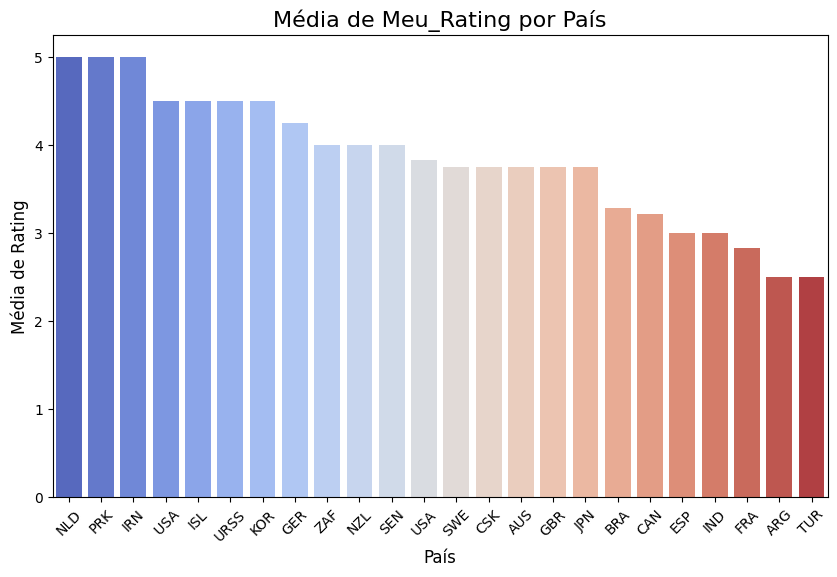

In [109]:
media_rating_pais = df.groupby('País')['Meu_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_rating_pais.index, y=media_rating_pais.values, palette='coolwarm', hue=media_rating_pais.index) 
plt.title('Média de Meu_Rating por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Média de Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 9. Distribuição de Gêneros Assistidos

Gêneros agrupados em 'Outros':
  - Mistério: 2.31%
  - Crime: 2.31%
  - História: 1.79%
  - Musical: 1.28%
  - Documentário: 1.28%
  - Guerra: 0.51%
  - Western: 0.51%
  - Horror: 0.26%
  - Aventrua: 0.26%


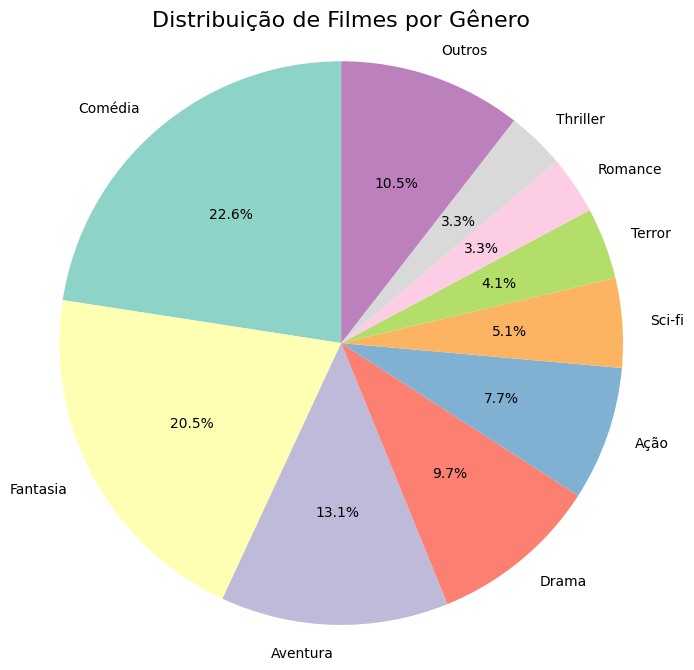

In [110]:
filmes_por_genero = df['Genero'].value_counts()
percentual_genero = filmes_por_genero / filmes_por_genero.sum() * 100
generos_outros = percentual_genero[percentual_genero < 3]

print("Gêneros agrupados em 'Outros':")
for genero, percentual in generos_outros.items():
    print(f"  - {genero}: {percentual:.2f}%")

genero_modificado = percentual_genero.copy()
genero_modificado[percentual_genero < 3] = 0 # remover os generos q tenham menos de 3% senao o gráfico de pizza fica horroroso
genero_modificado['Outros'] = percentual_genero[percentual_genero < 3].sum()
genero_modificado = genero_modificado[genero_modificado > 0]

plt.figure(figsize=(8, 8))
plt.pie(genero_modificado.values, labels=genero_modificado.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribuição de Filmes por Gênero', fontsize=16)
plt.axis('equal')
plt.show()


### 10. Filmes Mais Longos/Mais Curtos por Gênero

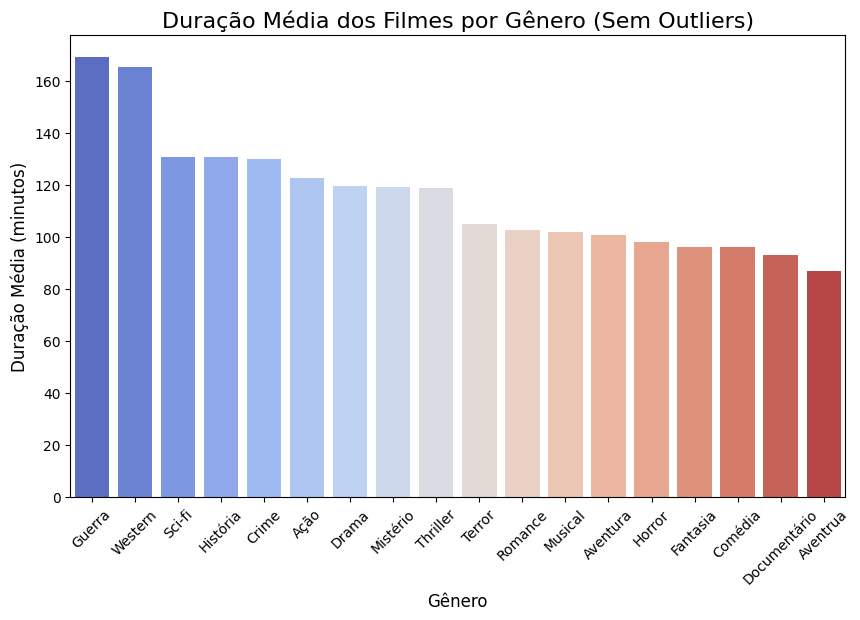

In [111]:
df_sem_outliers = df[df['Outlier_t'] == 0]

#sem outliers
duracao_genero_sem_outliers = df_sem_outliers.groupby('Genero')['Tempo'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=duracao_genero_sem_outliers.index, y=duracao_genero_sem_outliers.values, palette='coolwarm', hue=duracao_genero_sem_outliers.index, legend=False)
plt.title('Duração Média dos Filmes por Gênero (Sem Outliers)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Duração Média (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 11. Evolução dos Ratings ao Longo do Tempo

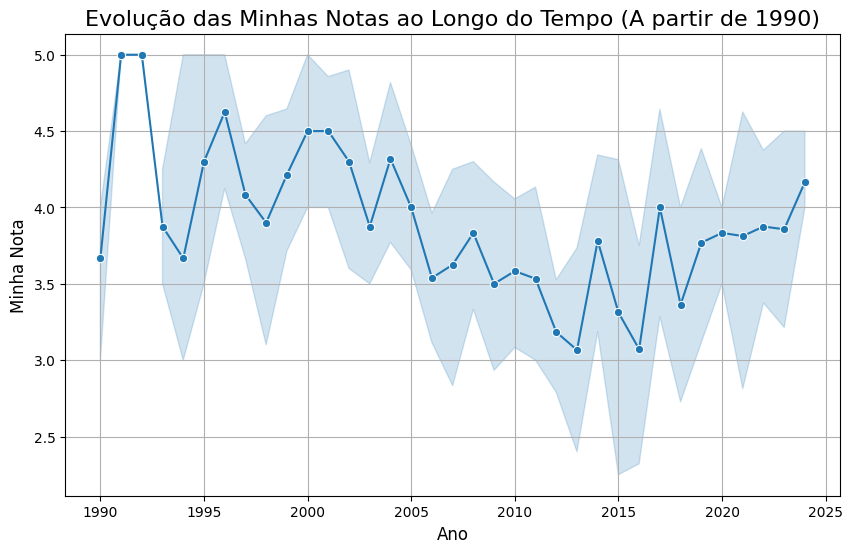

In [112]:
df_pos_1960 = df[df['Ano'] >= 1990]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Ano', y='Meu_Rating', data=df_pos_1960, marker='o')
plt.title('Evolução das Minhas Notas ao Longo do Tempo (A partir de 1990)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Minha Nota', fontsize=12)
plt.grid(True)
plt.show()


### 12. Top Filmes Baseado em Rating Geral

In [113]:
top_filmes = df.sort_values(by='Rating_Geral', ascending=False).head(10)
print(top_filmes[['Filme', 'Rating_Geral', 'Meu_Rating']])

                                   Filme  Rating_Geral  Meu_Rating
26                                   기생충           4.6         4.5
67                            GoodFellas           4.5         4.0
196               O Cavaleiro das Trevas           4.5         5.0
384  Spider-Man: Across the Spider-Verse           4.4         4.0
8                                Сталкер           4.4         4.5
95                          Perfect Blue           4.4         4.5
316                         Interstellar           4.4         5.0
299                             Whiplash           4.4         5.0
355    Spider-Man: Into the Spider-Verse           4.4         5.0
7                      Central do Brasil           4.3         4.5


In [114]:
filme_mais_alto = df.loc[df['Rating_Geral'].idxmax()]
filme_mais_baixo = df.loc[df['Rating_Geral'].idxmin()]

print("Filme com o Rating_Geral mais alto:")
print(f"  - Filme: {filme_mais_alto['Filme']}")
print(f"  - Meu Rating: {filme_mais_alto['Meu_Rating']}")
print(f"  - Rating Geral: {filme_mais_alto['Rating_Geral']}")
print(f"  - Ano: {filme_mais_alto['Ano']}")
print(f"  - País: {filme_mais_alto['País']}")
print()

print("Filme com o Rating_Geral mais baixo:")
print(f"  - Filme: {filme_mais_baixo['Filme']}")
print(f"  - Meu Rating: {filme_mais_baixo['Meu_Rating']}")
print(f"  - Rating Geral: {filme_mais_baixo['Rating_Geral']}")
print(f"  - Ano: {filme_mais_baixo['Ano']}")
print(f"  - País: {filme_mais_baixo['País']}")

Filme com o Rating_Geral mais alto:
  - Filme: 기생충
  - Meu Rating: 4.5
  - Rating Geral: 4.6
  - Ano: 2019
  - País: KOR

Filme com o Rating_Geral mais baixo:
  - Filme: Pocahontas II: Journey to a New World
  - Meu Rating: 2.5
  - Rating Geral: 2.0
  - Ano: 1998
  - País: USA
